<a href="https://colab.research.google.com/github/Changho0514/web1/blob/main/01_numpy_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Linear Regression Numpy Implementation

In [2]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X, y= make_regression(n_samples=100, n_features=1, noise=0.4, bias=50)

In [4]:
def plotLine(theta0, theta1, X, y):
    max_x = np.max(X) + 100
    min_x = np.min(X) - 100


    xplot = np.linspace(min_x, max_x, 1000)
    yplot = theta0 + theta1 * xplot



    plt.plot(xplot, yplot, color='#58b970', label='Regression Line')

    plt.scatter(X,y)
    plt.axis([-10, 10, 0, 200])
    plt.show()

In [5]:
def hypothesis(theta0, theta1, x):
    return theta0 + (theta1*x)  # w1 + w2x

def cost(theta0, theta1, X, y):
    costValue = 0 
    for (xi, yi) in zip(X, y):
        costValue += 0.5 * ((hypothesis(theta0, theta1, xi) - yi)**2)
    return costValue

def derivatives(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0

    '''
    f(x) = wx+b
    Loss = (y-wx-b) **2
    dLoss/dw = 2 * (y-wx-b) * x
    dLoss/dw = (y-f(x))) * x
    '''

    for (xi, yi) in zip(X, y):
        dtheta0 += hypothesis(theta0, theta1, xi) - yi
        dtheta1 += (hypothesis(theta0, theta1, xi) - yi)*xi

    dtheta0 /= len(X)
    dtheta1 /= len(X)

    return dtheta0, dtheta1

def updateParameters(theta0, theta1, X, y, alpha): #y: true값, alpha: learning rate 
    dtheta0, dtheta1 = derivatives(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1

In [6]:
def LinearRegression(X, y):
    theta0 = np.random.rand()
    theta1 = np.random.rand()
    
    for i in range(0, 1000):
        if i % 100 == 0:
            plotLine(theta0, theta1, X, y)
            print(cost(theta0, theta1, X, y))
        theta0, theta1 = updateParameters(theta0, theta1, X, y, 0.005)

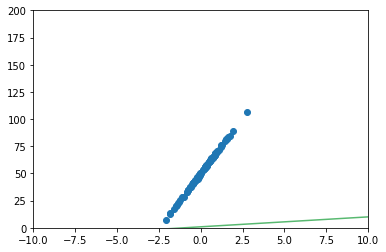

[145139.43907252]


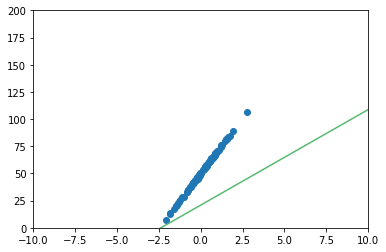

[51327.11758283]


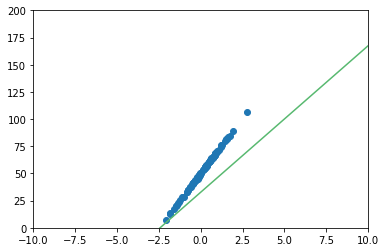

[18154.8701681]


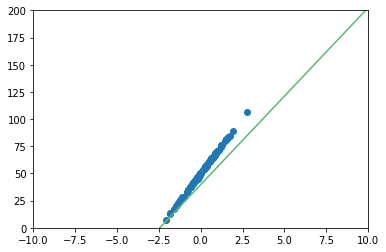

[6425.07076978]


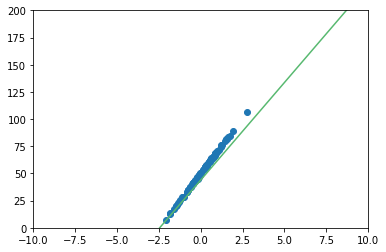

[2277.37236889]


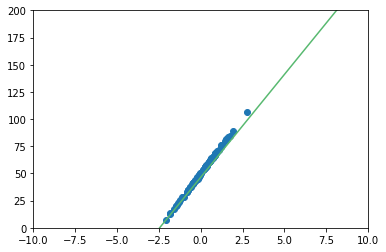

[810.72759636]


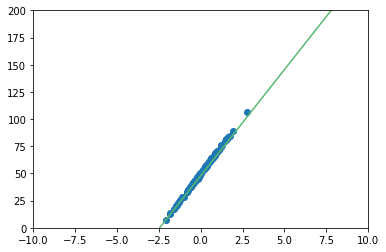

[292.11354802]


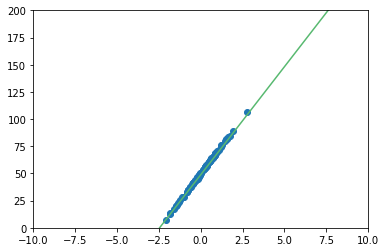

[108.72775326]


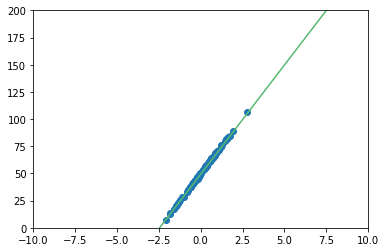

[43.88075829]


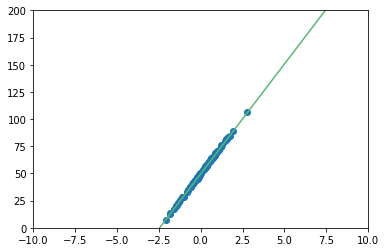

[20.95004004]


In [7]:
LinearRegression(X, y)

# 2. Ridge Regression Numpy Implementation

In [1]:
def hypothesis(theta0, theta1, x):
    return theta0 + (theta1*x) 

def Ridge_cost(theta0, theta1, X, y):
    costValue = 0 
    for (xi, yi) in zip(X, y):
        costValue += 0.5 * ((hypothesis(theta0, theta1, xi) - yi)**2)  # penalty 필요함 
    costValue += 0.01 * theta1 **2 # 각 데이터마다 더해주는건 아니다. L2는 weight하나에 대해 더해주는 거니까. 여기선 람다가 0.01임 
    # penalty = 0.01 * theta1 * theta1
    # costValue += penalty
    return costValue

def Ridge_derivatives(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0
    for (xi, yi) in zip(X, y):
        dtheta0 += hypothesis(theta0, theta1, xi) - yi
        dtheta1 += (hypothesis(theta0, theta1, xi) - yi)*xi

    dtheta0 /= len(X)
    dtheta1 /= len(X)

    dtheta1 += 2 * 0.01 * theta1

    return dtheta0, dtheta1

def updateParameters(theta0, theta1, X, y, alpha):
    dtheta0, dtheta1 = Ridge_derivatives(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1

In [8]:
def RidgeRegression(X, y):
    theta0 = np.random.rand()
    theta1 = np.random.rand()
    
    for i in range(0, 1000):
        if i % 100 == 0:
            plotLine(theta0, theta1, X, y)
            print(Ridge_cost(theta0, theta1, X, y))
        theta0, theta1 = updateParameters(theta0, theta1, X, y, 0.005)

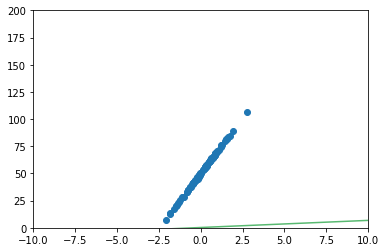

[148945.97996126]


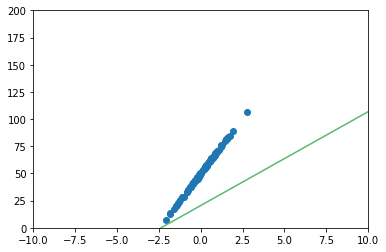

[52673.87355384]


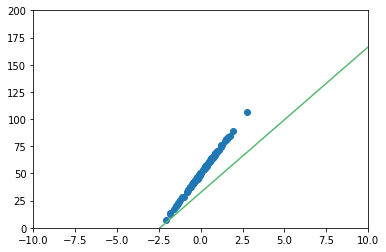

[18632.61932359]


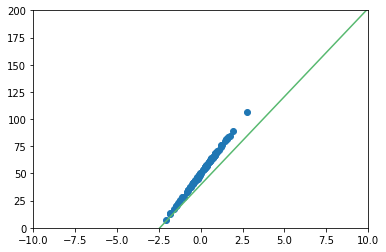

[6596.00190253]


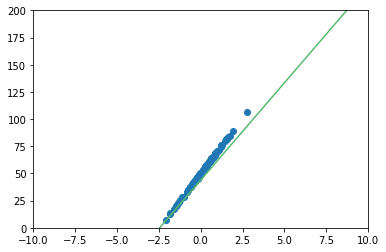

[2340.08940465]


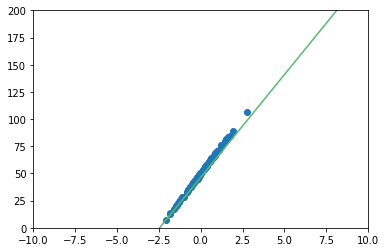

[835.34554431]


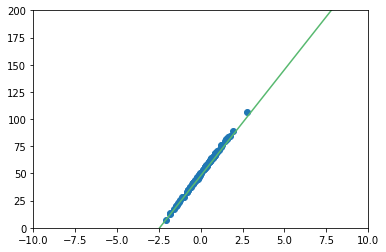

[303.35850511]


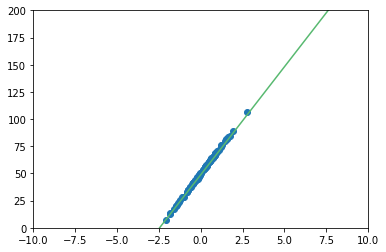

[115.30308759]


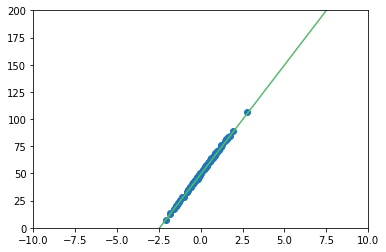

[48.84021656]


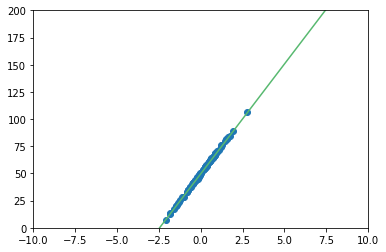

[25.35923122]


In [9]:
RidgeRegression(X, y)

# 3. Lasso Regression Numpy Implementation

In [13]:
def hypothesis(theta0, theta1, x):
    return theta0 + (theta1*x) 

def Lasso_cost(theta0, theta1, X, y):
    costValue = 0 
    for (xi, yi) in zip(X, y):
        costValue += 0.5 * ((hypothesis(theta0, theta1, xi) - yi)**2)

    costValue += 0.01 *np.abs(theta1) # numpy의 절댓값 구해주는 함수
    return costValue

def Lasso_derivatives(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0
    for (xi, yi) in zip(X, y):
        dtheta0 += hypothesis(theta0, theta1, xi) - yi
        dtheta1 += (hypothesis(theta0, theta1, xi) - yi)*xi

    dtheta0 /= len(X)
    dtheta1 /= len(X)
    
    if theta1 > 0:
      dtheta1 += 0.01 * 1
    else:
      dtheta1 += 0.01 * (-1)
    return dtheta0, dtheta1

def updateParameters(theta0, theta1, X, y, alpha):
    dtheta0, dtheta1 = Lasso_derivatives(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1

In [14]:
def LassoRegression(X, y):
    theta0 = np.random.rand()
    theta1 = np.random.rand()
    
    for i in range(0, 1000):
        if i % 100 == 0:
            plotLine(theta0, theta1, X, y)
            print(Lasso_cost(theta0, theta1, X, y))
        theta0, theta1 = updateParameters(theta0, theta1, X, y, 0.005)

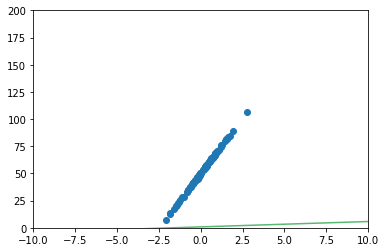

[146378.96322308]


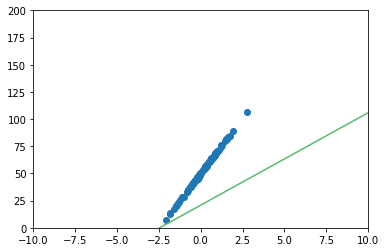

[51771.67595525]


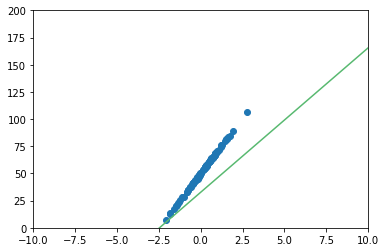

[18315.69323144]


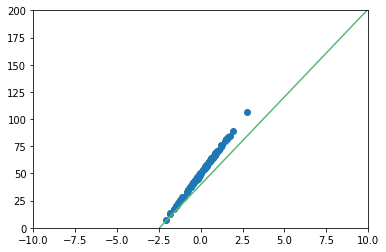

[6484.08231362]


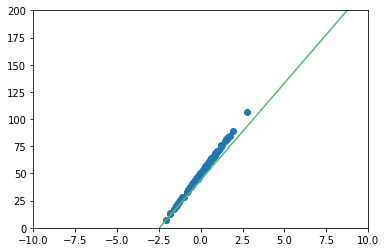

[2299.54003282]


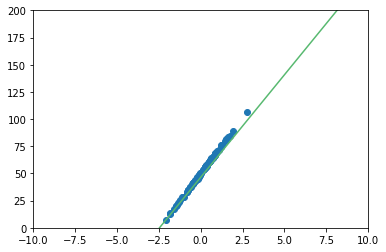

[819.38295578]


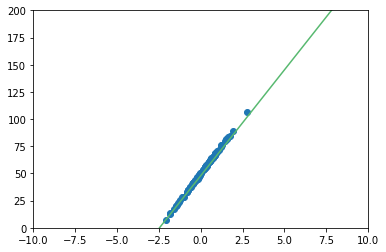

[295.71046658]


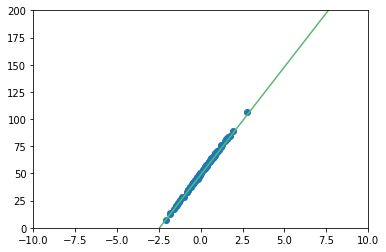

[110.3723604]


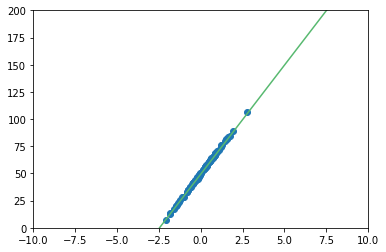

[44.73893822]


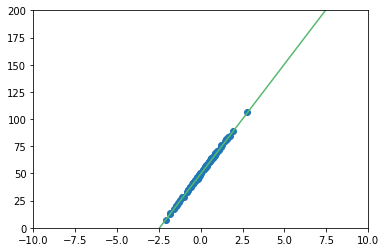

[21.47340061]


In [15]:
LassoRegression(X, y)

# 4. ElasticNet Numpy Implementation  (HW1)

In [ ]:
def hypothesis(theta0, theta1, x):
    return theta0 + (theta1*x) 

def EN_cost(theta0, theta1, X, y):
    costValue = 0 
    for (xi, yi) in zip(X, y):
        costValue += 0.5 * ((hypothesis(theta0, theta1, xi) - yi)**2)
    costValue += 0.01 * theta1 *theta1  #Ridge
    costValue += 0.01 * np.abs(theta1)  #Lasso
    return costValue

def EN_derivatives(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0
    for (xi, yi) in zip(X, y):
        dtheta0 += hypothesis(theta0, theta1, xi) - yi
        dtheta1 += (hypothesis(theta0, theta1, xi) - yi)*xi

    dtheta0 /= len(X)
    dtheta1 /= len(X)

    dtheta1 += 2 *0.01 * theta1 # Ridge


     if theta1 > 0:
      dtheta1 += 0.01 * 1
    else:
      dtheta1 += 0.01 * (-1)  # Lasso

    return dtheta0, dtheta1

def updateParameters(theta0, theta1, X, y, alpha):
    dtheta0, dtheta1 = EN_derivatives(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1

In [ ]:
def ENRegression(X, y):
    theta0 = np.random.rand()
    theta1 = np.random.rand()
    
    for i in range(0, 1000):
        if i % 100 == 0:
            plotLine(theta0, theta1, X, y)
            print(EN_cost(theta0, theta1, X, y))
        theta0, theta1 = updateParameters(theta0, theta1, X, y, 0.005)

In [ ]:
ENRegression(X, y)